## Анализ топа фильмов

<img src='top_movies.jpg' style='width:600px;height:400px'/>

----------
Комания "Тралала" была известна не только по анализу игр, но так же и по анализу лучших фильмов мирового кинематографа, поэтому ей было поручено:

1. Успешно загрузить данные, подготовить их и если потребуется - преобразовать для дальнейшего исследования. 

2. Вычислить статистические признаки по жанрам. 

3. Вычислить статистические признаки по режессерам.

4. А так же провести анализ по возрастному рейтингу и понять существует ли зависимость между возрастным рейтингом и доходом фильмов.

----------

## Загрузка данных и подготовка к анализу

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings

warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [2]:
try:
    df_imdb = pd.read_csv('Top_250_Movies.csv', index_col=[0])
except:
    print('Ошибка, проверьте правильность заполненных данных')
else:
    print('Данные успешно загружены')


Данные успешно загружены


----------
Общая информация по датасету:




In [3]:
df_imdb.head()

,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
rank,,,,,,,,,,,,
1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


--------
Информация о пропусках и типах данных

---------

In [4]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1 to 250
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         250 non-null    object 
 1   year         250 non-null    int64  
 2   rating       250 non-null    float64
 3   genre        250 non-null    object 
 4   certificate  250 non-null    object 
 5   run_time     250 non-null    object 
 6   tagline      250 non-null    object 
 7   budget       250 non-null    object 
 8   box_office   250 non-null    object 
 9   casts        250 non-null    object 
 10  directors    250 non-null    object 
 11  writers      250 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 25.4+ KB


-------------------------------------

df_imdb — результат запроса. В нём содержится следующая информация:

- `name` - Название фильма
- `year` - Год выхода фильма
- `rating` - Оценка фильма
- `genre` - Жанр фильма
- `certificate` - Возрастной рейтинг фильма
- `run_time` - Продолжительность фильма 
- `tagline` - Слоган
- `budget` - Бюджет
- `box_office` - Общие кассовые сборы по всему миру
- `casts` -  Все актеры фильма
- `directors` - Режиссер фильма
- `writers` - Сценарист фильма

Пропуски в таблицах не наблюдаются. Необходимости преобразовывать типы нет.

Для колонок `year`, `rating` можем уменьшить занимаемую память

-------------------------------------

In [5]:
df_imdb = df_imdb.astype({'year': 'int16', 
                          'rating': 'float16'})

In [6]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1 to 250
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         250 non-null    object 
 1   year         250 non-null    int16  
 2   rating       250 non-null    float16
 3   genre        250 non-null    object 
 4   certificate  250 non-null    object 
 5   run_time     250 non-null    object 
 6   tagline      250 non-null    object 
 7   budget       250 non-null    object 
 8   box_office   250 non-null    object 
 9   casts        250 non-null    object 
 10  directors    250 non-null    object 
 11  writers      250 non-null    object 
dtypes: float16(1), int16(1), object(10)
memory usage: 22.5+ KB


----------
Немного сэкономили занимаемую память

----------

----------
#### Наличие дубликатов в датасете:

In [7]:
df_imdb.duplicated().sum()

0

Дубликаты не обнаружены, можем перейти к анализу.

----------

## Проведем анализ с жанрами: 

----------
##### Средние рейтинги по жанрам:

----------


In [8]:
df_imdb.groupby(by='genre', as_index=False).mean()[['genre', 'rating']].nlargest(10, 'rating')

,genre,rating
32,"Adventure,Western",8.796875
2,"Action,Adventure,Drama",8.695312
25,"Adventure,Drama,Sci-Fi",8.601562
64,"Crime,Drama,Fantasy",8.601562
73,"Drama,Family,Fantasy",8.601562
11,"Action,Drama,Mystery",8.500000
22,"Adventure,Comedy,Sci-Fi",8.500000
35,"Animation,Adventure,Drama",8.500000
40,"Animation,Drama,War",8.500000
80,"Drama,Music",8.500000


----------

##### Средняя касса по жанрам:

----------

In [9]:
df_genre_bo_mean = df_imdb[['name', 'genre']]
df_genre_bo_mean['box_office'] = df_imdb[df_imdb['box_office'].str.isnumeric()]['box_office'].apply(int)

df_genre_bo_mean = df_genre_bo_mean.groupby(by='genre', as_index=False).mean()[['genre', 'box_office']].nlargest(10, 'box_office')
df_genre_bo_mean

,genre,box_office
2,"Action,Adventure,Drama",1.259042e+09
35,"Animation,Adventure,Drama",9.685118e+08
5,"Action,Adventure,Sci-Fi",9.090774e+08
3,"Action,Adventure,Fantasy",8.729981e+08
10,"Action,Drama",8.567496e+08
25,"Adventure,Drama,Sci-Fi",7.738672e+08
34,"Animation,Adventure,Comedy",7.518886e+08
29,"Adventure,Family,Fantasy",6.839988e+08
31,"Adventure,Thriller",4.765121e+08
67,"Crime,Drama,Thriller",4.525773e+08



Как мы можем наблюдать, только у одной строки с жанрами средний доход выходит больше чем на миллиард. Другие жанры с учетом того, что мы взяли десять самых кассовых, находятся, не считая еще группы жанров, заметно ниже. И позволяет нам предположиться, что потребитель выбирает в среднем чаще фильмы или мульфильмы с приключениями, экшном, драмой, фантастикой или фэнтази, чем остальные типы жанров

Создадим диаграмму, которая визуально поделит нам на три части среднюю кассу.



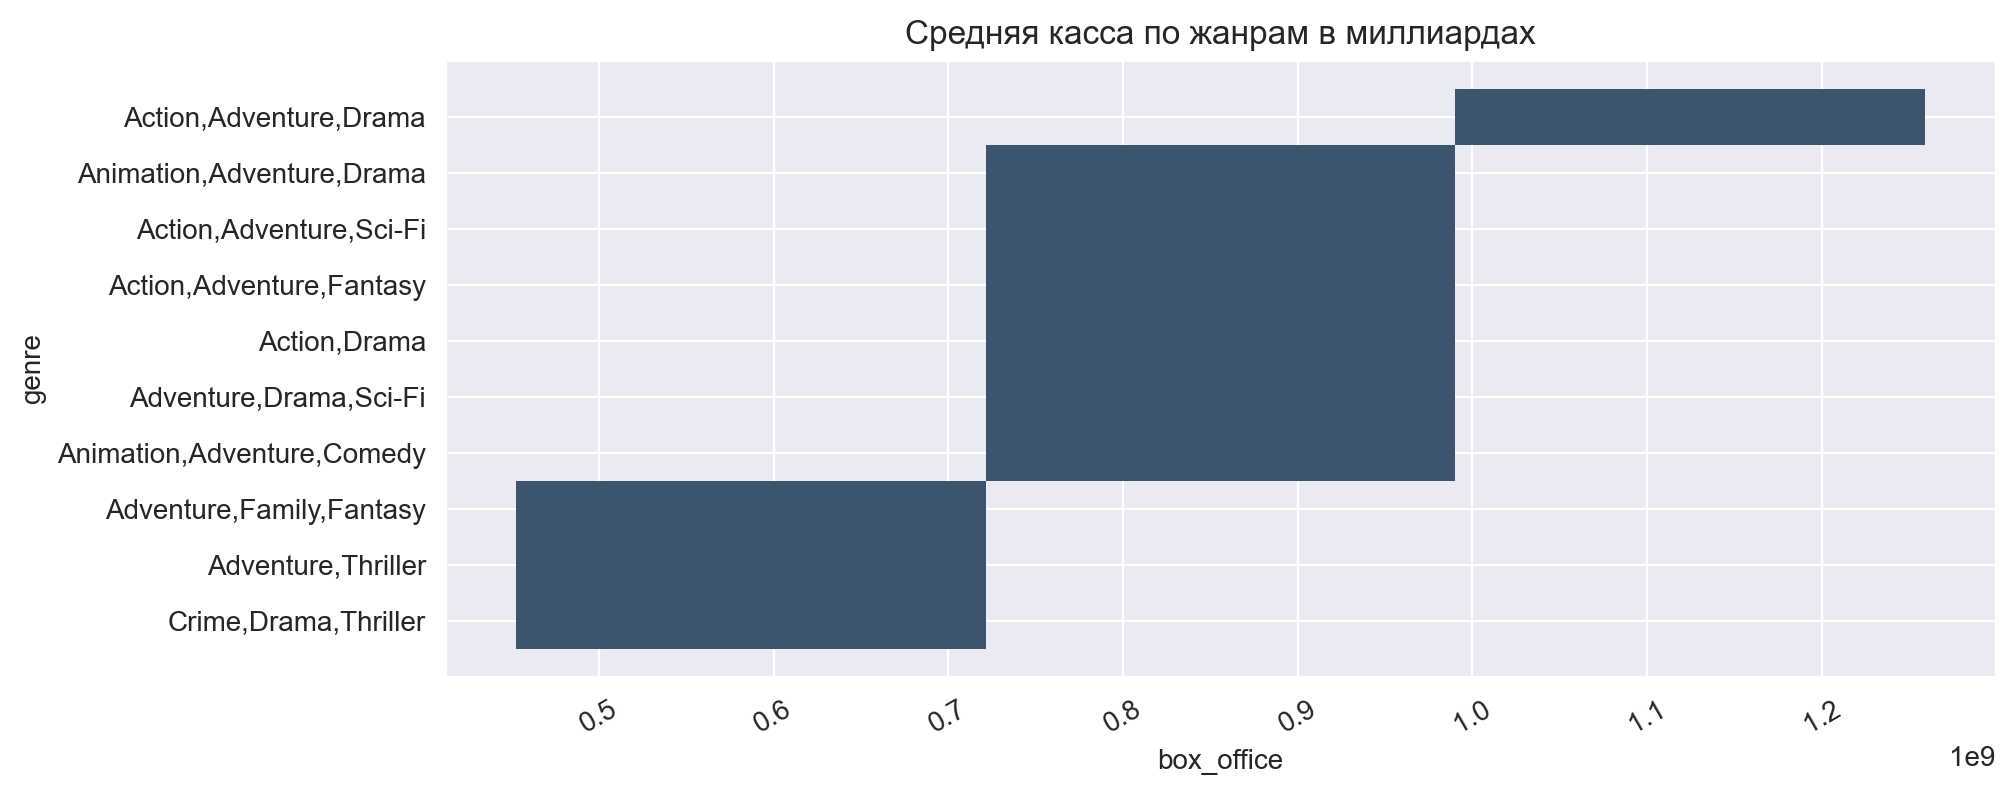

In [10]:
plt.figure(figsize=(10, 4), dpi=200)
plt.title('Cредняя касса по жанрам в миллиардах')
plt.xticks(rotation=30)

sns.histplot(data=df_genre_bo_mean, x='box_office', y='genre', bins=3);

----------

##### Найдем к каким жанрам относятся 10 самых лучших фильмов.

----------

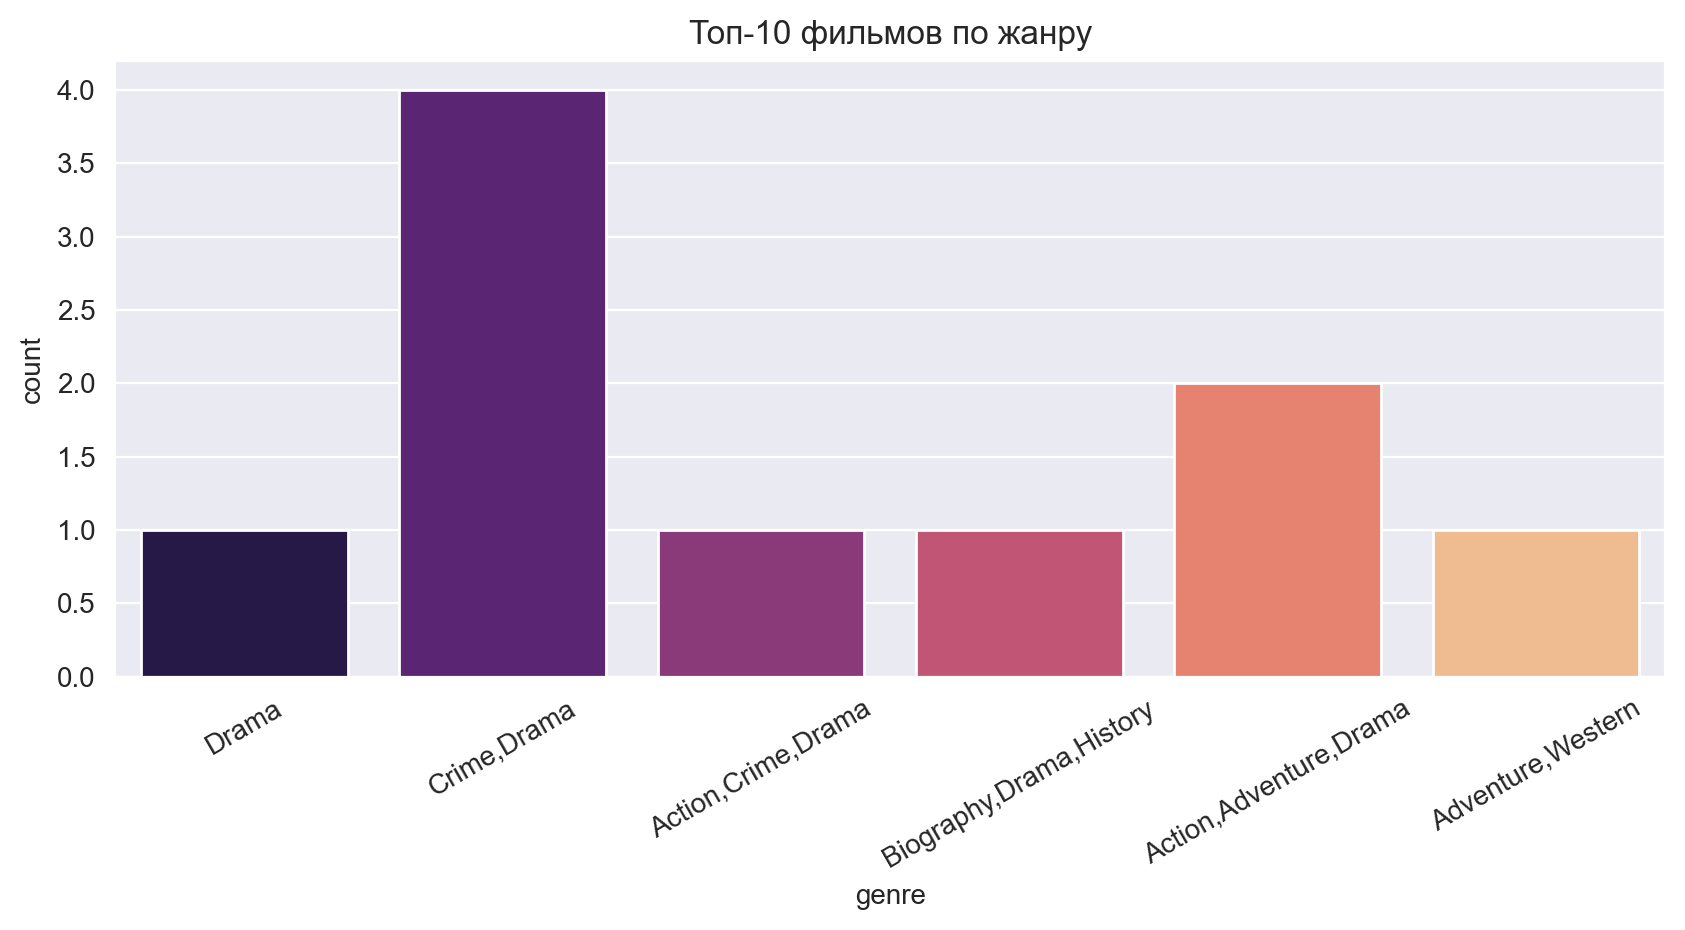

In [11]:
top_10 = df_imdb.nlargest(10, 'rating')

plt.figure(figsize=(10, 4), dpi=200)
plt.title('Топ-10 фильмов по жанру')
plt.xticks(rotation=30)

sns.countplot(data=top_10, x='genre', palette='magma');



На таблице можно заметить, что 10-ка наиболее оценненых фильмов принадлежит столбцу с жанрами - 'Crime, Drama', на втором месте - 'Action, Adventure, Drama'. Остальные фильмы распределились равномерно между собой.

----------

## Проведем анализ по режиссерам:

----------
##### Средний доход фильмов по режиссерам

----------

In [12]:
df_dir_mean = df_imdb[['name', 'directors']]
df_dir_mean['box_office'] = df_imdb[df_imdb['box_office'].str.isnumeric()]['box_office'].apply(int)

df_dir_mean = df_dir_mean.groupby(by='directors', as_index=False).mean()[['directors', 'box_office']].nlargest(10, 'box_office')

df_dir_mean

,directors,box_office
7,"Anthony Russo,Joe Russo",2.425927e+09
75,Jon Watts,1.921847e+09
77,Joseph Kosinski,1.488733e+09
31,David Yates,1.342360e+09
148,Todd Phillips,1.074458e+09
83,Lee Unkrich,1.067316e+09
112,Peter Jackson,9.975355e+08
125,"Roger Allers,Rob Minkoff",9.685118e+08
6,"Andrew Stanton,Lee Unkrich(co-director)",9.416380e+08
110,"Pete Docter,Ronnie Del Carmen(co-director)",8.588480e+08



На результате выдим, что у большинства, а имеенно у 6-ти режиссеров, киноленты собрали в среднем миллиард долларов.

----------

----------
##### Режиссеры, которые попали в рейтинг чаще остальных.

----------

In [13]:
df_dir_count = df_imdb[['name', 'directors']]
df_dir_count.groupby(by='directors').count().nlargest(10, 'name')

,name
directors,
Akira Kurosawa,7
Christopher Nolan,7
Martin Scorsese,7
Stanley Kubrick,7
Steven Spielberg,7
Alfred Hitchcock,6
Billy Wilder,5
Charles Chaplin,5
Quentin Tarantino,5



Как мы можем наблюдать по выводу - Akira Kurosawa, Christopher Nolan, Martin Scorsese, Stanley Kubrick и Steven Spielberg удостоились чести попасть в рейтинг по 7 раз каждый.

----------

----------
##### Режиссеры 10-ти самых высокооцененных фильмов:

----------

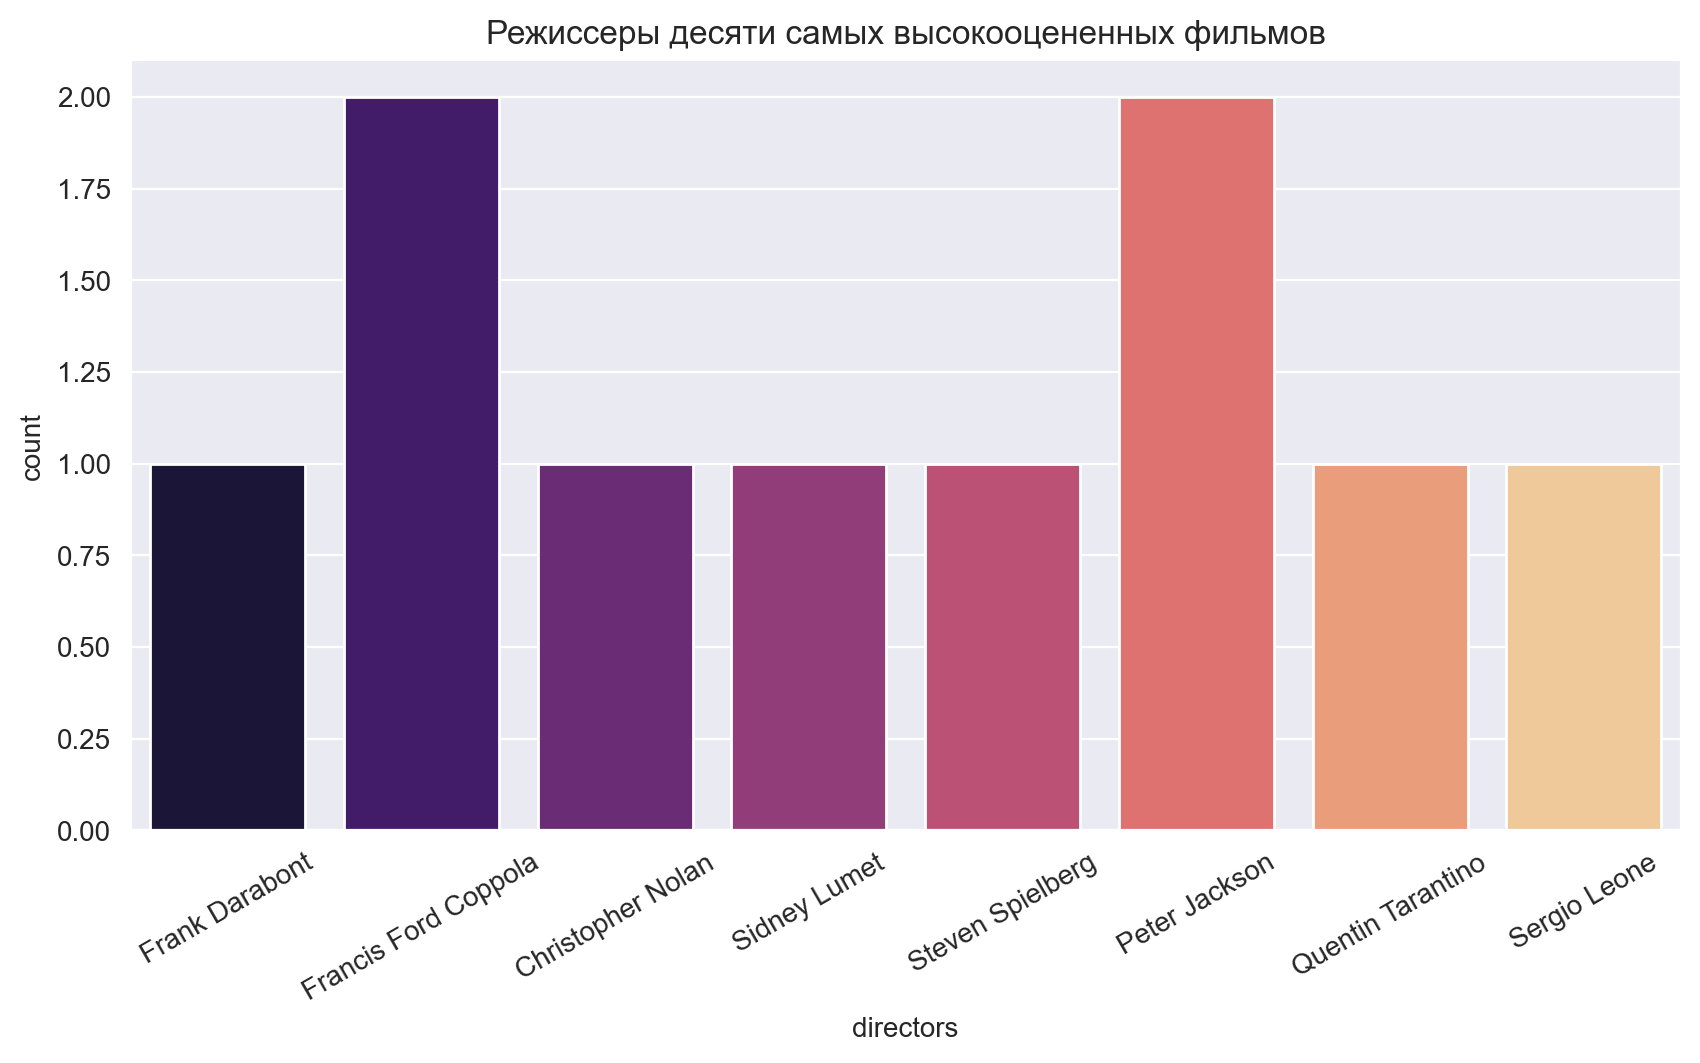

In [14]:
top_10_d = df_imdb.nlargest(10, 'rating')

plt.figure(figsize=(10, 5), dpi=200)
plt.title('Режиссеры десяти самых высокооцененных фильмов')
plt.xticks(rotation=30)
sns.countplot(data=top_10_d, x='directors', palette='magma');


Судя по выводу диаграммы,  два режиссера, а именно 'Francis Ford Coppola' и 'Peter Jackson' являются заслуженными иконами киноиндустрии, ведь сразу несколько их фильмов попали в топ-10 самых высокоценных фильмов.

----------

----------
##### Давайте взглянем получше на эти фильмы.

----------

In [15]:
df_imdb[['name', 'genre', 'directors', 'rating']].nlargest(10, 'rating')

,name,genre,directors,rating
rank,,,,
1,The Shawshank Redemption,Drama,Frank Darabont,9.296875
2,The Godfather,"Crime,Drama",Francis Ford Coppola,9.203125
3,The Dark Knight,"Action,Crime,Drama",Christopher Nolan,9.000000
4,The Godfather Part II,"Crime,Drama",Francis Ford Coppola,9.000000
5,12 Angry Men,"Crime,Drama",Sidney Lumet,9.000000
6,Schindler's List,"Biography,Drama,History",Steven Spielberg,9.000000
7,The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",Peter Jackson,9.000000
8,Pulp Fiction,"Crime,Drama",Quentin Tarantino,8.898438
9,The Lord of the Rings: The Fellowship of the Ring,"Action,Adventure,Drama",Peter Jackson,8.796875


----------

##### Найдем какую общую сумму заработали все фильмы режессеров и выберем 10 наибольших.

----------

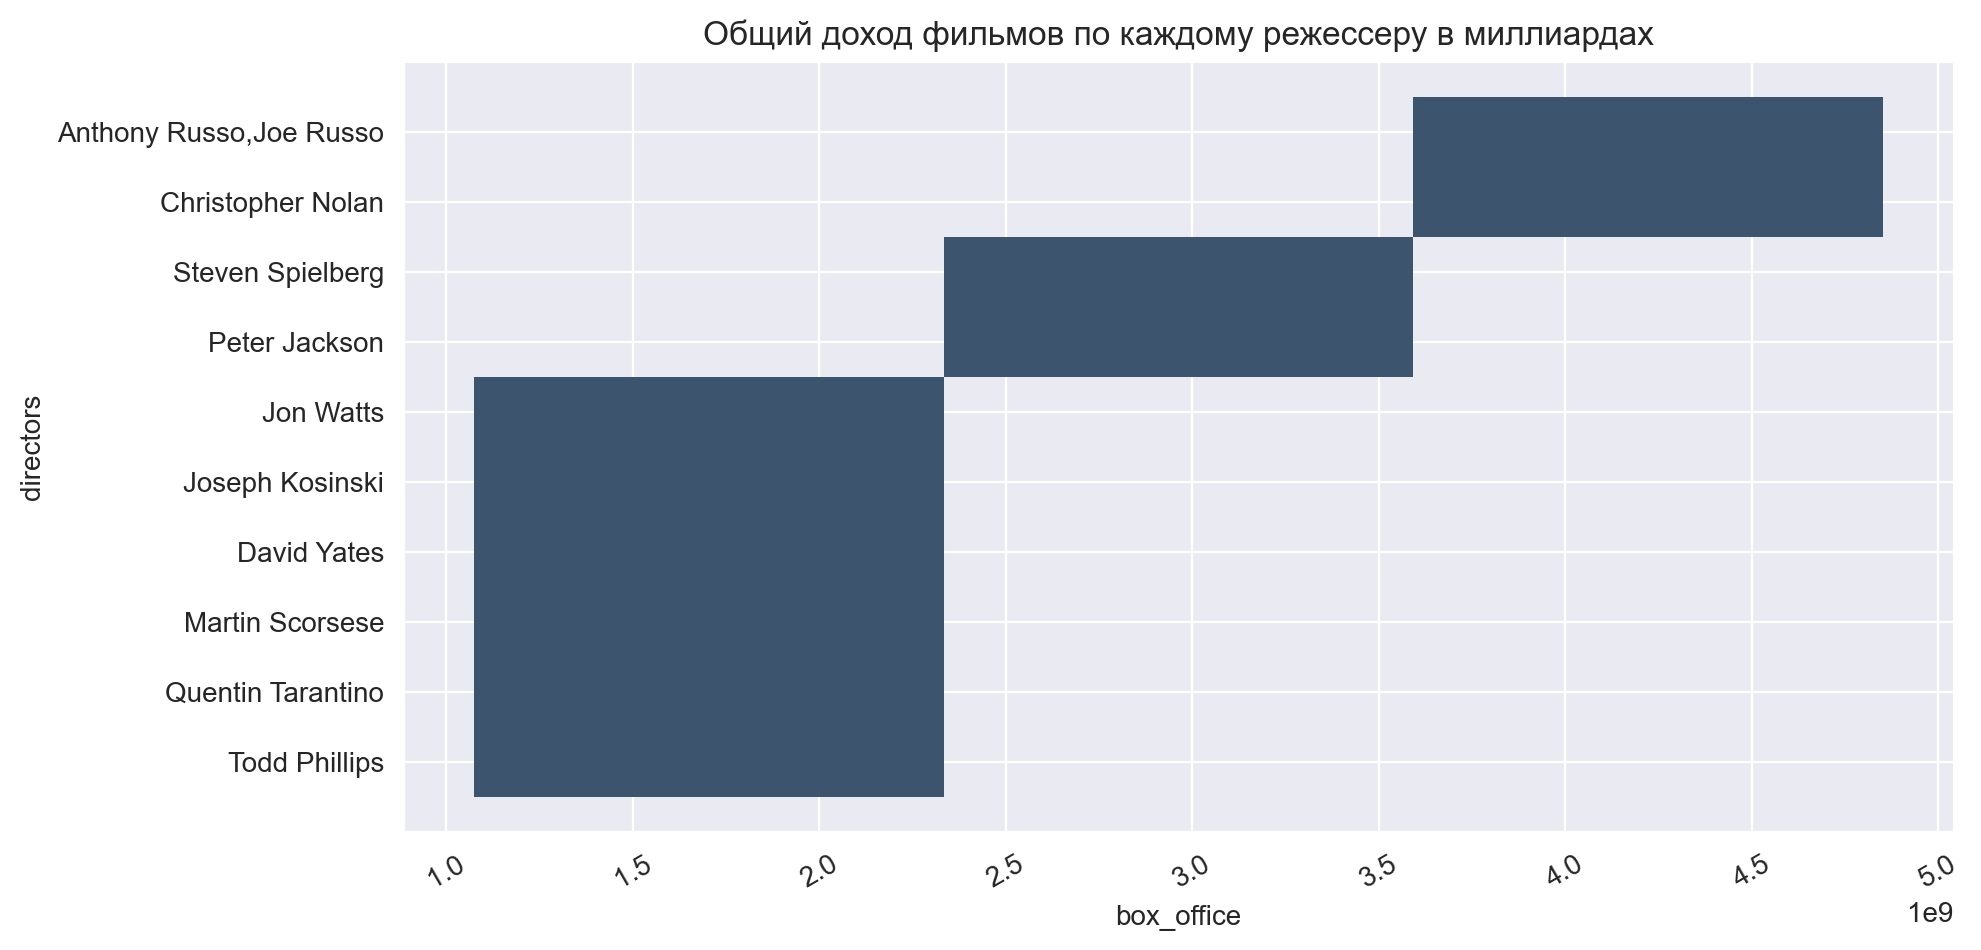

In [16]:
df_box_of_with_directors = df_imdb[['name', 'directors']]
df_box_of_with_directors['box_office'] = df_imdb[df_imdb['box_office'].str.isnumeric()]['box_office'].apply(int)

directors_box_office = df_box_of_with_directors.groupby(by='directors').sum().nlargest(10, 'box_office')


plt.figure(figsize=(10, 5), dpi=200)
plt.title('Общий доход фильмов по каждому режессеру в миллиардах')
plt.xticks(rotation=30)

sns.histplot(data=directors_box_office, x='box_office', y='directors', bins=3);

In [17]:
directors_box_office 

,box_office
directors,
"Anthony Russo,Joe Russo",4.851854e+09
Christopher Nolan,4.221516e+09
Steven Spielberg,3.254923e+09
Peter Jackson,2.992606e+09
Jon Watts,1.921847e+09
Joseph Kosinski,1.488733e+09
David Yates,1.342360e+09
Martin Scorsese,1.208287e+09
Quentin Tarantino,1.145281e+09



На графике и в выводе результата мы можем наблюдать что:

Режиссеры - Jon Watt, Joseph Kosinski, David Yates, Martin Scorsese, Quentin Tarantino и Todd Phillips
принесли кассу в промежутке, который начинается с чуть более 1-го миллиарда и заканчиваясь почти на 2-ух миллиардах.

Режиссеры - Peter Jackson, Steven Spielberg принесли кассу в промежутку с почти 3-ех до 3.25 миллирадов.

Режиссеры - Christopher Nolan и братья Anthony Russo, Joe Russo сильно вырываются вперед и принесли кассу в промежутке с 4.2 до 4.8 миллиардов соответственно.

----------

## Проведем анализ по возрастному рейтингу:

----------
##### Посмотрим на количество фильмов по рейтингу.

----------

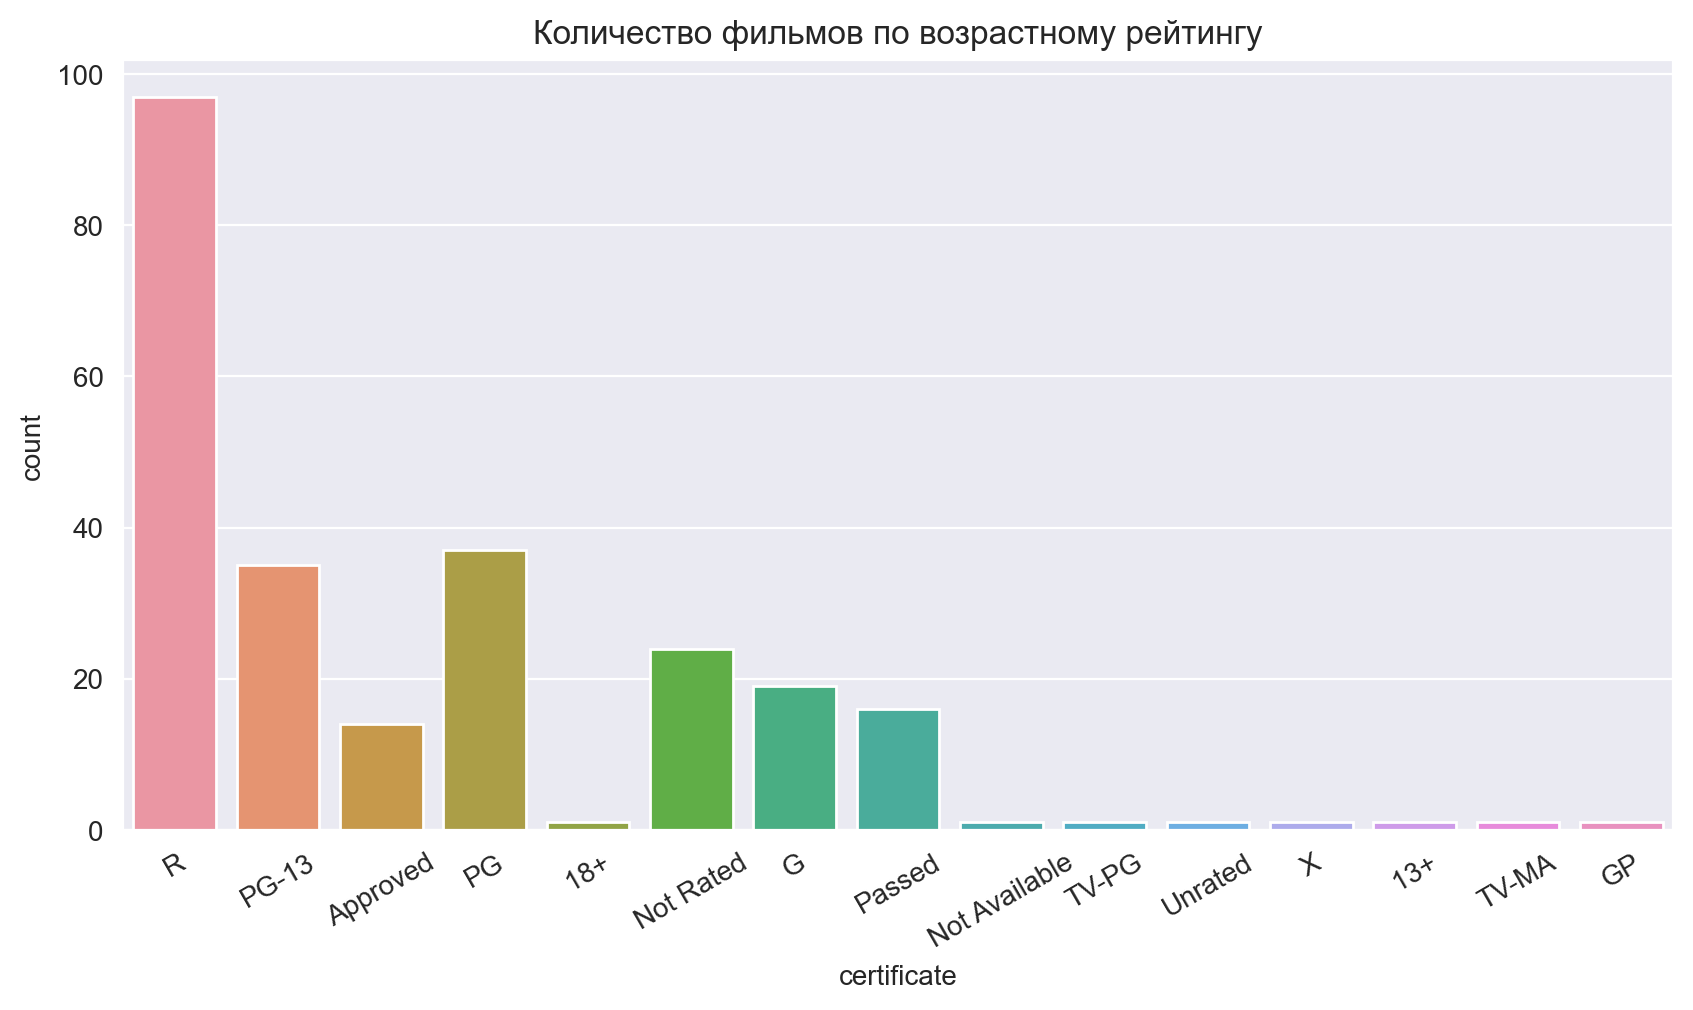

In [18]:
plt.figure(figsize=(10, 5), dpi=200)
plt.title('Количество фильмов по возрастному рейтингу')
plt.xticks(rotation=30)

sns.countplot(data=df_imdb, x='certificate');



Из диаграммы мы наблюдаем, что большинство фильмов принадлежат возрастному рейтингу R, который предпологает много насилия и сквернословия. Даллее будут расмотрены обозначения для рейтингов.

Вот что означают эти возрастные рейтинги:
    
    R: Этот сертификат означает "Действительно, действительно не для детей". Ожидайте много насилия и сквернословия.
    
    PG: Это означает "Вполне подходит для детей". Могут присутствовать легкие выражения или насилие, но в целом фильм безопасен для маленьких глаз.
    
    PG-13: "Родителям настоятельно рекомендуется брать с собой подростков". Этот фильм для детей постарше, которые могут выдержать немного больше действий и интенсивности.
    
    Not Rated: Это код для "Мы понятия не имеем, что в этом фильме". Это дикая карта, так что пристегнитесь и надейтесь на лучшее.
    
    G: "Хорошо для всех". Этот фильм безопасен даже для самых маленьких зрителей. Ожидайте много поющих животных и счастливых концовок.
    
    Passed: Этот знак - старый. Это означает, что фильм был одобрен цензорами, которые посчитали его "Допустимым для публичного просмотра".
    
    Approved: Еще один старый, но добрый фильм. Это означает, что цензоры сочли фильм "Приемлемым для всех зрителей".
    
    18+: Этот фильм не для слабонервных. Это как фильм с рейтингом R, но еще более напряженный. Оставьте детей дома и приготовьтесь прикрыть глаза.
    
    Not Available: Этот сертификат означает "Вам придется посмотреть его и узнать". Это тайна!
    
    TV-PG: "Довольно хорошо для телевидения". Это как сертификат PG для фильмов, но для телепередач. Идеально подходит для семейных ситкомов.
    
    Unrated: Это означает, что фильм еще не прошел цензуру. Смотрите на свой страх и риск!
    
    X: Это код для "XXX-rated". Ожидайте много секса и наготы. Определенно не для первого свидания.
    
    13+: Это для подростков и тинэйджеров. Это как PG-13, но для телевизионных шоу.
    
    TV-MA: "Только для зрелой аудитории". Это как фильм с рейтингом R, но для телешоу. Ожидайте много насилия, секса и нецензурной лексики.
    
    GP: Это означает "Для широкой аудитории, рекомендуется родительское руководство". Это как PG, но родители должны быть немного более вовлечены в процесс принятия решения о том, подходит ли это для их детей.
    
----------

----------
##### Рассмотрим как рейтинг фильмов влияет на доход.

----------

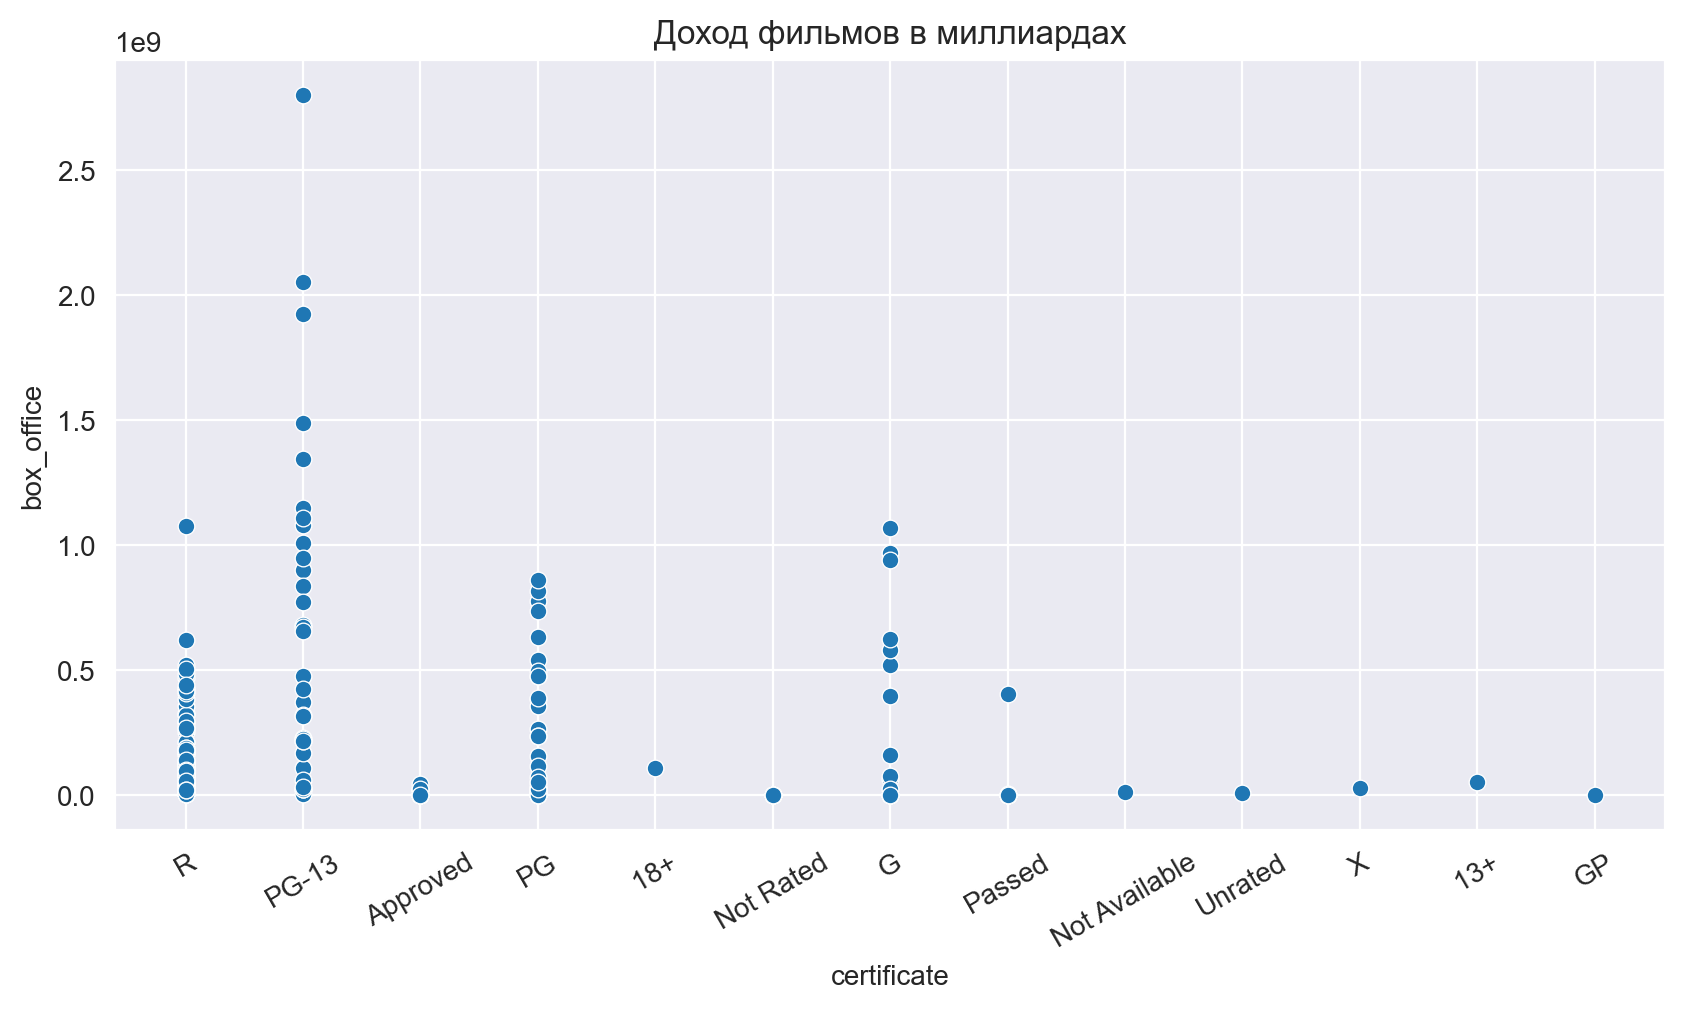

In [19]:
df_rat_bo = df_imdb[['name', 'certificate']]
df_rat_bo['box_office'] = df_imdb[df_imdb['box_office'].str.isnumeric()]['box_office'].apply(int)

plt.figure(figsize=(10, 5), dpi=200)
plt.title('Доход фильмов в миллиардах')
plt.xticks(rotation=30)

sns.scatterplot(data=df_rat_bo[df_rat_bo['box_office'].notna()], x='certificate', y='box_office');




На графике можно увидеть, что доход свыше полумиллиарда, принадлежит примущественно фильмам с семейным рейтингом, на который можно взять детей и не бояться, что они смогут увидеть что-либо запрещенное. Тогда как фильмы с рейтинком R, собирает в основном кассу до полумиллиарда и изредка больше.


Для того, чтобы убедиться в том, что семейные фильмы действительно приносят больше дохода, чем остальные. Найдем среднее по каждому из рейтингов.



In [20]:
df_rat_bo[df_rat_bo['box_office'].notna()].\
                    groupby(by='certificate').mean().\
                    sort_values(by='box_office', ascending=False)

,box_office
certificate,
PG-13,6.866712e+08
G,3.390963e+08
PG,2.440825e+08
R,1.636842e+08
18+,1.091148e+08
13+,5.228741e+07
Passed,3.712001e+07
X,2.696037e+07
Not Available,1.148768e+07




Как мы видим по выводу, фильмы с возрастной категорией для детей и подростков - PG-13, G и PG действительно зарабатывают денег больше чем остальные фильмы в других категориях.

----------

----------
Так же наблюдается заметный выброс кассы в возрастном рейтиге 'PG-13', давайте взглянем на этот фильм.

In [21]:
df_rat_bo.nlargest(1, 'box_office')

,name,certificate,box_office
rank,,,
78,Avengers: Endgame,PG-13,2.799439e+09


В результате можем видеть фильм Avengers: Endgame вышедший в 2019 году, который по используемым данным на тот момент собрал кассу в 2.8 миллиарда долларов. 

----------

## Вывод:

- Из csv-файла извлекли необходмые данные - пропуски и дубликаты не были обнаружены.


- Были проведены иследование по жанрам:

     - Средние значения рейтинга по жанрам. Жанры, которые имеют в среднем рейтинг выше других - Adventure, Western и Action, Adventure, Drama
     - Средние значения сборов кассы по жанрам. Жанры, которые в среднем зарабатывают больше всех - Action, Adventure, Drama
     - К каким жанрам относятся 10 самых высокооцененных фильмов. Жанры - Crime, Drama чаще других находится в рейтинге 10 самых оценненых фильмов.


- Был проведен анализ по режиссерам:

     - Рассчитан средний доход фильма по каждому режиссеру. Выше всех средний доход по фильмам принадлежит братьям Anthony Russo и Joe Russo.
     
     - Были найдены режиссеры, чаще всего попадающие в этот топ. Akira Kurosawa, Christopher Nolan, Martin Scorsese, Stanley Kubrick и Steven Spielberg удостоились чести попасть в рейтинг по 7 раз каждый.

     - Найдены режиссеры 10-ти самых высокооцененных фильмов. Примечательно, что Francis Ford Coppola и Peter Jackson дважды вошли в этот список.
     
     - Был посчитан общий доход фильмов по каждому режиссеру в миллиардах. Больше всех принесли доход фильмы братьев Anthony Russo и Joe Russo.
     

- Был проведен анализ по возрастному рейтингу:

     - Больше всего фильмов находившихся в этом рейтинге, приходится на возрастной рейтинг R - Этот сертификат означает "Действительно, действительно не для детей". Ожидайте много насилия и сквернословия.

     - Было рассмотрено как рейтинг влияет на доход. Чаще всего фильмы с семейным рейтигном, куда родители могут взять детей зарабатывают больше полумиллирда долларов. И в среднем зарабатывают больше остальных.

     - Самым кассовым фильмом в топе является фильм Avengers: Endgame вышедший в 2019 году, который заработал 2.8 миллиарда долларов и у которого рейтинг PG-13: "Родителям настоятельно рекомендуется брать с собой подростков". Этот фильм для детей постарше, которые могут выдержать немного больше действий и интенсивности.